In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv("Fish.csv")

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [40]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [45]:
data['Species'].value_counts()

2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: Species, dtype: int64

In [46]:
X = data.drop("Species", axis =1)
y = data["Species"]

In [47]:
#UNIVARIATE SELECTION
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)

In [48]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [49]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [50]:
featureScores

,Specs,Score
0,Weight,18866.556522
1,Length1,362.074566
2,Length2,389.490165
3,Length3,428.735947
4,Height,244.884327
5,Width,48.877939


In [51]:
featureScores.nlargest(3,'Score')

,Specs,Score
0,Weight,18866.556522
3,Length3,428.735947
2,Length2,389.490165


In [52]:
#FEATURE IMPORTANCE
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\nishanth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [53]:
print(model.feature_importances_)

[0.0933105  0.1290045  0.17634682 0.1381632  0.33829152 0.12488345]


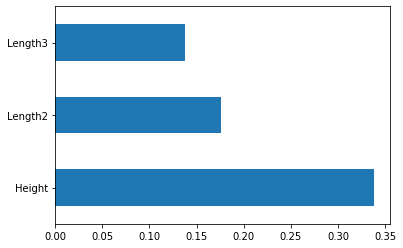

In [54]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

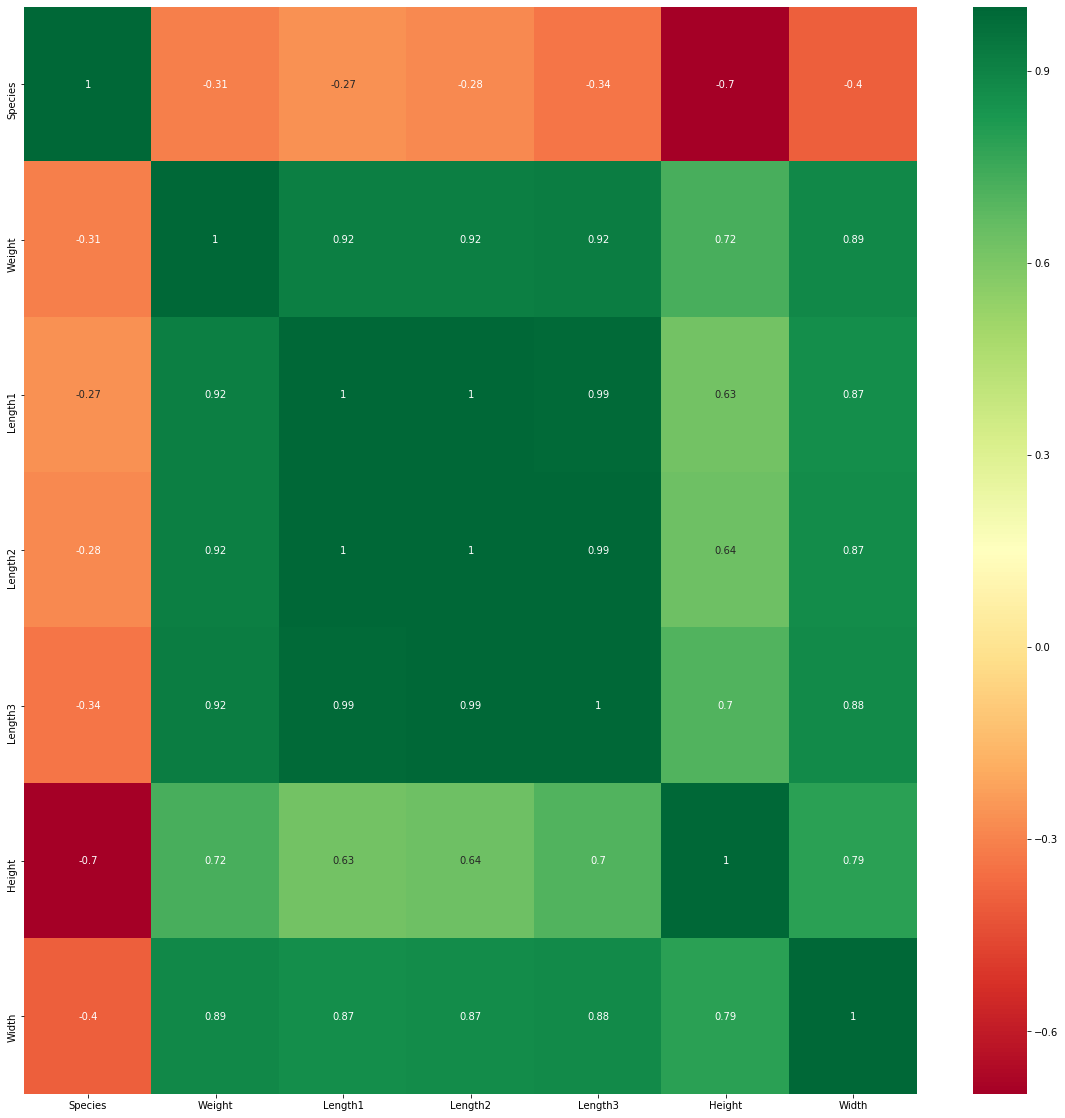

In [55]:
#CORRELATION MATRIX
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [66]:
#MODEL 1 using Univariate Selection
from sklearn.model_selection import train_test_split
X = data[["Weight","Length3","Length2"]]
y = data["Species"]
X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0 )

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier()

In [69]:
model.fit(X_Train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
y_pred = model.predict(X_Test)

In [71]:
y_pred

array([0, 2, 2, 4, 0, 2, 2, 3, 0, 2, 3, 3, 0, 2, 2, 1, 1, 3, 2, 0, 4, 0,
       2, 3, 2, 0, 0, 2, 2, 5, 0, 2])

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
M1_acc = accuracy_score(y_test,y_pred)
M1_acc

0.65625

In [74]:
#MODEL 2 Using Feature Importance
X = data[["Height","Length3","Length2"]]
y = data["Species"]

In [75]:
X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0 )

In [76]:
model.fit(X_Train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
y_pred = model.predict(X_Test)

In [78]:
y_pred

array([0, 4, 4, 2, 2, 2, 2, 3, 0, 2, 3, 3, 2, 2, 4, 4, 4, 3, 4, 0, 2, 6,
       2, 3, 2, 0, 0, 4, 2, 5, 0, 2])

In [79]:
M2_acc = accuracy_score(y_test,y_pred)
M2_acc

0.6875

In [80]:
#MODEL 3 Using Correlation Matrix
X = data[["Height","Length3","Width"]]
y = data["Species"]

In [81]:
X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0 )

In [82]:
model.fit(X_Train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
y_pred = model.predict(X_Test)

In [84]:
y_pred

array([0, 4, 2, 2, 2, 2, 2, 3, 0, 2, 3, 3, 2, 2, 4, 4, 4, 3, 4, 0, 4, 2,
       2, 3, 4, 0, 0, 6, 2, 5, 0, 2])

In [85]:
M3_acc = accuracy_score(y_test,y_pred)
M3_acc

0.75